CS661 - Final Project

Name: Vivek Karhale,
      Pranit Kumbhar

Dataset:

https://catalog.data.gov/dataset/provisional-weekly-deaths-by-region-race-age-997d6

https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab/about_data

Mount Google Drive

In [104]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
# After this mount, the current directory is /content

# !ls -l drive/MyDrive/data/*

fp_hss = 'drive/MyDrive/data/Provisional_COVID-19_Deaths_by_HHS_Region__Race__and_Age.csv'
fp_state = 'drive/MyDrive/data/Provisional_COVID-19_Death_Counts_by_Week_Ending_Date_and_State.csv'

Mounted at /content/drive


Import Necessary Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as pclr
from IPython.display import Image
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from plotly.subplots import make_subplots

Create Data clusters:

COVID-19_Deaths_by_HHS_Region__Race__and_Age

In [4]:
column_date = ['Start Date', 'End Date']

df_hss = df = pd.read_csv(fp_hss,
                          dtype= {'HHS Region':str, 'MMWR Week': 'Int64', 'COVID-19 Deaths': 'Int64', 'Total Deaths': 'Int64'},
                          parse_dates=column_date)
df_hss.drop(['Data As Of', 'Week-Ending Date', 'Footnote'], inplace=True, axis=1)

df_hss['Age Group'] = df_hss['Age Group'].str.replace(' years', '')
df_hss['Age Group'] = df_hss['Age Group'].str.replace(' and over', '+')
df_hss['Age Group'] = df_hss['Age Group'].replace({'0-4':'0-04', '5-17':'05-17'})

hss_byweek = df_hss['Group'] == 'By Week'
hss_bymonth = df_hss['Group'] == 'By Month'
hss_byyear = df_hss['Group'] == 'By Year'
hss_bytotal = df_hss['Group'] == 'By Total'
hss_byhss = df_hss['HHS Region'] != 'United States'
hss_byus = df_hss['HHS Region'] == 'United States'

df_us_byweek = df_hss[hss_byus & hss_byweek]
df_us_bymonth = df_hss[hss_byus & hss_bymonth]
df_us_byyear = df_hss[hss_byus & hss_byyear]
df_us_bytotal = df_hss[hss_byus & hss_bytotal]
df_hss_byweek = df_hss[hss_byhss & hss_byweek]
df_hss_bymonth = df_hss[hss_byhss & hss_bymonth]
df_hss_byyear = df_hss[hss_byhss & hss_byyear]
df_hss_bytotal = df_hss[hss_byhss & hss_bytotal]

Data clustering and cleaning for Covid-19 deaths by state and week

In [5]:
columns_date = ['Data as of', 'Start Date', 'End Date', 'Week Ending Date']

df_state = df = pd.read_csv(fp_state,
                          dtype= {'HHS Region':str, 'MMWR Week': 'Int64', 'COVID-19 Deaths': 'Int64', 'Total Deaths': 'Int64'},
                          parse_dates=columns_date)
df_state.drop(['Data as of', 'Week Ending Date', 'Footnote'], inplace=True, axis=1)

state_byweek = df_state['Group'] == 'By Week'
state_bymonth = df_state['Group'] == 'By Month'
state_byyear = df_state['Group'] == 'By Year'
state_bytotal = df_state['Group'] == 'By Total'
state_bystate = df_state['State'] != 'United States'

df_state_byweek = df_state[state_bystate & state_byweek]
df_state_bymonth = df_state[state_bystate & state_bymonth]
df_state_byyear = df_state[state_bystate & state_byyear]
df_state_bytotal = df_state[state_bystate & state_bytotal]

Visualizations:

Comparison of Covid-19 deaths with total deaths from 2020 to 2023

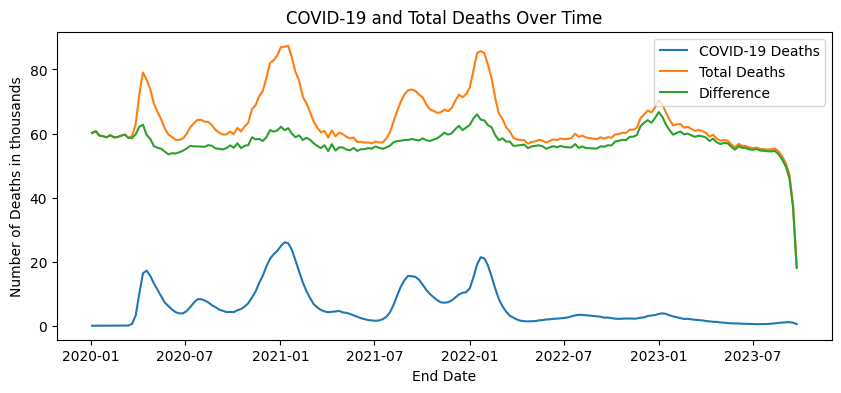

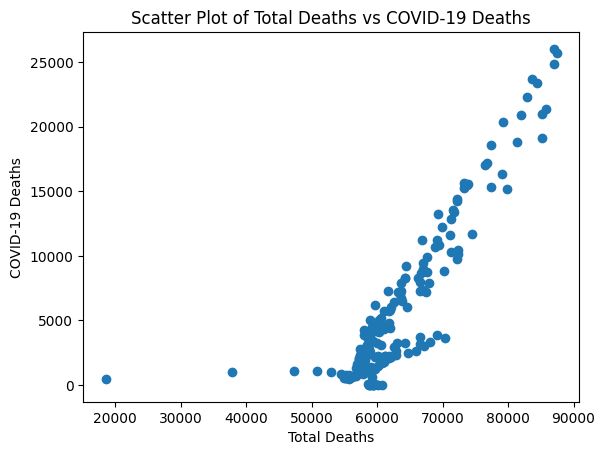

In [74]:
df = pd.DataFrame(df_us_byweek, columns=['End Date', 'COVID-19 Deaths', 'Total Deaths'])
sum_by_week = df.groupby(df['End Date'])[['COVID-19 Deaths','Total Deaths']].sum()

plt.figure(figsize=(10, 4))
plt.plot(sum_by_week.index, sum_by_week['COVID-19 Deaths']/1000, label='COVID-19 Deaths')
plt.plot(sum_by_week.index, sum_by_week['Total Deaths']/1000, label='Total Deaths')
plt.plot(sum_by_week.index, (sum_by_week['Total Deaths']-sum_by_week['COVID-19 Deaths'])/1000, label='Difference')
plt.xlabel('End Date')
plt.ylabel('Number of Deaths in thousands')
plt.title('COVID-19 and Total Deaths Over Time')
plt.legend(loc='upper right')
plt.show()

plt.scatter(sum_by_week['Total Deaths'], sum_by_week['COVID-19 Deaths'])
plt.xlabel('Total Deaths')
plt.ylabel('COVID-19 Deaths')
plt.title('Scatter Plot of Total Deaths vs COVID-19 Deaths')
plt.show()

Above graph shows that due to COVID-19, total deaths are increased whenever there is a peak or wave of covid infections. Number of deaths due to other reasons is steady over the period of three years.

Trend in Covid deaths over period of year:

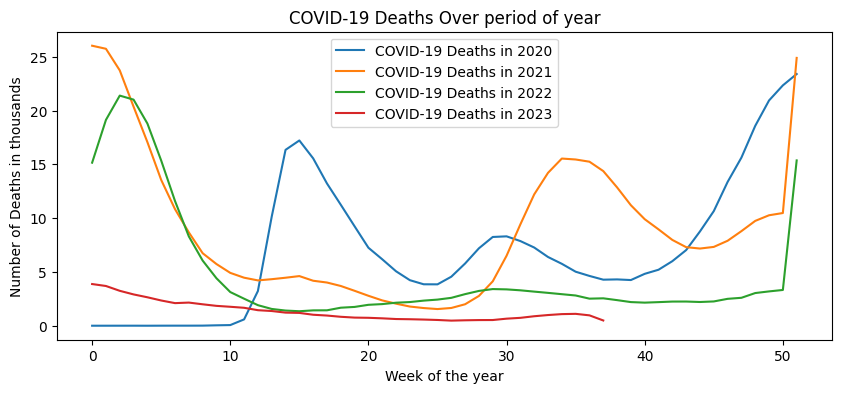

In [8]:
df = pd.DataFrame(df_us_byweek, columns=['Year', 'MMWR Week', 'COVID-19 Deaths'])

#Condider week 12/29/2019-1/4/2020 as first week of 2020
df['Year'] = df['Year'].replace({'2019/2020':'2020', '2020/2021': '2021', '2021/2022': '2022'})
df_2020 = df[df['Year']=='2020'].groupby(df['MMWR Week'])['COVID-19 Deaths'].sum().reset_index()
df_2021 = df[df['Year']=='2021'].groupby(df['MMWR Week'])['COVID-19 Deaths'].sum().reset_index()
df_2022 = df[df['Year']=='2022'].groupby(df['MMWR Week'])['COVID-19 Deaths'].sum().reset_index()
df_2023 = df[df['Year']=='2023'].groupby(df['MMWR Week'])['COVID-19 Deaths'].sum().reset_index()

plt.figure(figsize=(10, 4))
plt.plot(df_2020.index, df_2020['COVID-19 Deaths']/1000, label='COVID-19 Deaths in 2020')
plt.plot(df_2021.index, df_2021['COVID-19 Deaths']/1000, label='COVID-19 Deaths in 2021')
plt.plot(df_2022.index, df_2022['COVID-19 Deaths']/1000, label='COVID-19 Deaths in 2022')
plt.plot(df_2023.index, df_2023['COVID-19 Deaths']/1000, label='COVID-19 Deaths in 2023')
plt.xlabel('Week of the year')
plt.ylabel('Number of Deaths in thousands')
plt.title('COVID-19 Deaths Over period of year')
plt.legend()
plt.show()

High variations are seen in year 2020 and 2021. In year 2022, although there was a peak in number of deaths at start, that year saw a steady decline after that which continued in 2023.

Deaths as per Age Group

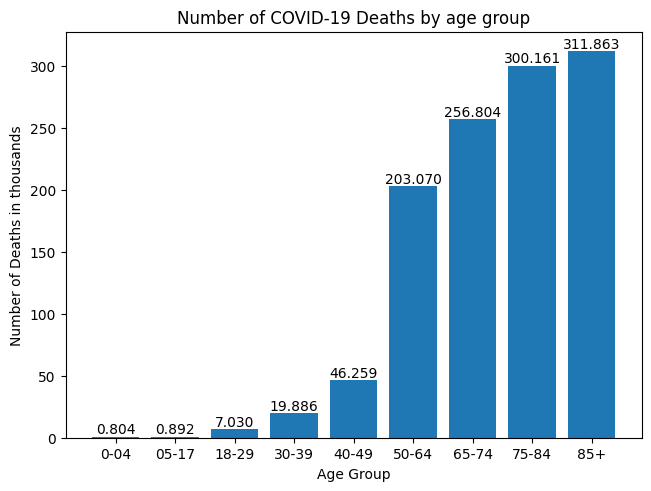

In [9]:
df = pd.DataFrame(df_us_byweek, columns=['Age Group', 'COVID-19 Deaths', 'Total Deaths'])
sum_by_age = df.groupby(df['Age Group'])[['COVID-19 Deaths','Total Deaths']].sum()

fig = plt.figure(layout='constrained')
ax = fig.subplots()
bar_container = ax.bar(sum_by_age.index, sum_by_age['COVID-19 Deaths']/1000)
ax.set(ylabel='Number of Deaths in thousands', title='Number of COVID-19 Deaths by age group')
ax.set(xlabel='Age Group')
ax.bar_label(bar_container, fmt='{:,.3f}')
plt.show()

Visualizations:

Number of Covid-19 deaths by state

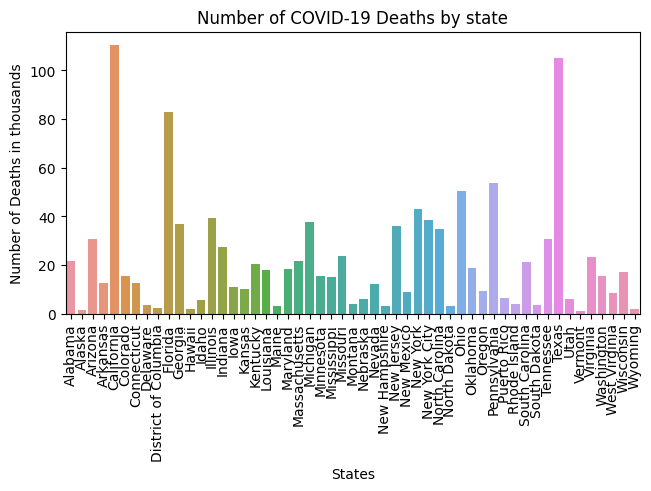

In [10]:
df = pd.DataFrame(df_state_bytotal, columns=['State', 'COVID-19 Deaths', 'Total Deaths'])
sum_by_state = df.groupby(df['State'])[['COVID-19 Deaths','Total Deaths']].sum()

fig.clear()
fig = plt.figure(layout='constrained')
plt.title('Number of COVID-19 Deaths by state')
ax = sns.barplot(data=sum_by_state, x=sum_by_state.index, y=sum_by_state['COVID-19 Deaths']/1000)
plt.xlabel('States')
plt.ylabel('Number of Deaths in thousands')
ax.set_xticklabels(sum_by_state.index, rotation='vertical')
plt.show()

Distribution over race and age groups

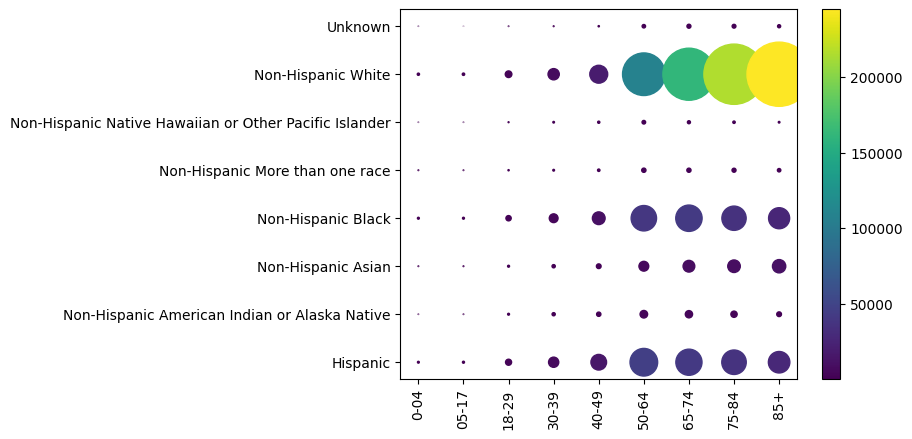

In [44]:
df = pd.DataFrame(df_us_bytotal, columns=['Race and Hispanic Origin Group', 'Age Group', 'COVID-19 Deaths'])

x = df['Age Group']
y = df['Race and Hispanic Origin Group']
colors = df['COVID-19 Deaths']
sizes =  (df['COVID-19 Deaths']/df['COVID-19 Deaths'].sum()*10000).astype(float)
plt.scatter(x, y, c=colors, s= sizes)
plt.xticks(rotation='vertical')
plt.colorbar()
None

Pivot of number of deaths due to COVID-19 in HHS regions by months.

In [36]:
df = pd.DataFrame(df_hss_bymonth, columns=['End Date', 'HHS Region', 'COVID-19 Deaths'])

df_byhhs = pd.pivot_table(df, index='HHS Region', columns='End Date', values='COVID-19 Deaths', aggfunc= 'sum', fill_value=0)
df_byhhs.style.background_gradient(cmap = 'gnuplot')

# plt.figure(figsize=(16, 4))
# ax = df_byhhs.plot(xticks=df_byhhs.columns, ylabel = 'Deaths')
# plt.title('COVID-19 Deaths by HHS Region and End Date')
# plt.xlabel('End Date')
# plt.ylabel('HHS Region')
# plt.show()

End Date,2020-01-31 00:00:00,2020-02-29 00:00:00,2020-03-31 00:00:00,2020-04-30 00:00:00,2020-05-31 00:00:00,2020-06-30 00:00:00,2020-07-31 00:00:00,2020-08-31 00:00:00,2020-09-30 00:00:00,2020-10-31 00:00:00,2020-11-30 00:00:00,2020-12-31 00:00:00,2021-01-31 00:00:00,2021-02-28 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-31 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-31 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00,2022-01-31 00:00:00,2022-02-28 00:00:00,2022-03-31 00:00:00,2022-04-30 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-31 00:00:00,2022-08-31 00:00:00,2022-09-30 00:00:00,2022-10-31 00:00:00,2022-11-30 00:00:00,2022-12-31 00:00:00,2023-01-31 00:00:00,2023-02-28 00:00:00,2023-03-31 00:00:00,2023-04-30 00:00:00,2023-05-31 00:00:00,2023-06-30 00:00:00,2023-07-31 00:00:00,2023-08-31 00:00:00,2023-09-23 00:00:00
HHS Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,0,0,231,6865,5235,1126,323,161,172,427,1295,3478,3686,1633,787,556,377,136,93,374,799,783,968,2001,3470,1456,341,265,490,406,319,415,402,604,470,623,778,439,303,181,110,79,69,176,156
02,0,0,3582,31251,8901,1936,802,567,552,845,2451,6835,8971,5667,3771,3160,1709,534,340,1338,2043,1836,1685,3386,9327,3105,838,618,1205,982,1057,1101,964,1152,1183,1637,1583,945,626,335,264,259,235,309,293
03,0,0,198,5978,5641,2058,1247,1360,1184,1658,4380,10720,9710,4514,2288,2512,1737,667,376,1650,3905,4555,3785,5879,9532,4404,1433,603,885,995,1043,1278,1170,1096,1072,1358,1683,1045,786,457,243,176,142,307,308
04,0,0,557,4095,4009,3389,10298,11277,6481,6011,8529,15890,22671,11056,5308,3937,3448,1951,3661,21279,24551,10780,4195,5272,16887,13497,4203,1417,1418,2314,3662,3985,2910,2080,1822,2525,3729,2192,1527,1075,818,673,718,1222,786
05,0,0,921,8944,7161,2971,1921,2259,2234,4976,14107,19931,12172,4815,2593,3845,3319,1362,822,3015,6637,7241,8013,13897,16377,7035,2210,929,1301,1440,1730,2087,1859,1780,1999,2459,2121,1282,1385,976,572,352,228,377,322
06,0,0,494,2913,2099,2108,8331,6819,3529,4549,8547,12718,15869,7963,3602,1910,1623,1142,2342,11301,12315,6264,3320,4114,10358,7879,2206,682,525,793,1685,1780,1243,828,729,1389,1754,959,753,503,335,200,185,400,241
07,0,0,25,781,970,457,550,978,1207,2284,5217,5499,3616,1260,628,429,384,358,910,2072,2032,1613,1499,2536,3949,2277,637,220,233,293,540,601,466,382,429,693,512,335,365,271,150,72,43,98,76
08,0,0,85,913,571,271,342,298,480,1307,3279,3468,1667,653,378,309,435,303,378,806,1456,2113,2271,1835,1986,1384,449,151,166,273,374,270,244,243,386,380,281,175,207,154,97,42,48,60,52
09,0,0,291,2595,2823,2969,6276,5129,2601,1897,3909,17405,25261,9877,2967,1319,989,703,1413,4993,6363,4443,4462,4944,9974,6996,2071,642,768,1239,1959,1641,1075,717,1192,2265,1614,863,873,598,479,360,335,459,295


Distribution of deaths due to covid by 'Race and Hispanic Origin Group' over 'Age Group'

In [58]:
df = pd.DataFrame(df_hss_byweek, columns=['Race and Hispanic Origin Group', 'Age Group', 'COVID-19 Deaths'])

df_byhhs = pd.pivot_table(df, index='Race and Hispanic Origin Group', columns='Age Group', values='COVID-19 Deaths', aggfunc= 'sum', fill_value=0)
df_byhhs.style.background_gradient(cmap = 'Spectral')

Age Group,0-04,05-17,18-29,30-39,40-49,50-64,65-74,75-84,85+
Race and Hispanic Origin Group,,,,,,,,,
Hispanic,0,0,827,4022,12013,43268,38680,34127,26038
Non-Hispanic American Indian or Alaska Native,0,0,0,0,46,1479,1198,639,246
Non-Hispanic Asian,0,0,0,0,241,3111,5272,6335,7468
Non-Hispanic Black,0,0,432,2432,7019,35362,38279,31930,23136
Non-Hispanic More than one race,0,0,0,0,0,103,72,33,0
Non-Hispanic Native Hawaiian or Other Pacific Islander,0,0,0,0,0,99,63,0,0
Non-Hispanic White,0,0,735,4302,15424,105358,159765,215103,244474
Unknown,0,0,0,0,0,165,245,205,131


In [59]:
df = df_hss_byweek.copy()
df['Mortality Rate'] = (df['COVID-19 Deaths'] / df['Total Deaths']).replace([np.inf, np.nan], 0) * 100

age_group_mortality = df.groupby('Age Group')[['COVID-19 Deaths', 'Total Deaths']].sum()
age_group_mortality['Mortality Rate'] = (age_group_mortality['COVID-19 Deaths'] / age_group_mortality['Total Deaths']) * 100

highest_mortality_age_group = age_group_mortality['Mortality Rate'].idxmax()
highest_mortality_rate = age_group_mortality['Mortality Rate'].max()

print('Age Group with the highest COVID-19 mortality rate:', highest_mortality_age_group)
print('Highest COVID-19 mortality rate: {:.2f}'.format(highest_mortality_rate))

Age Group with the highest COVID-19 mortality rate: 65-74
Highest COVID-19 mortality rate: 9.68


Covid-19 deaths by month

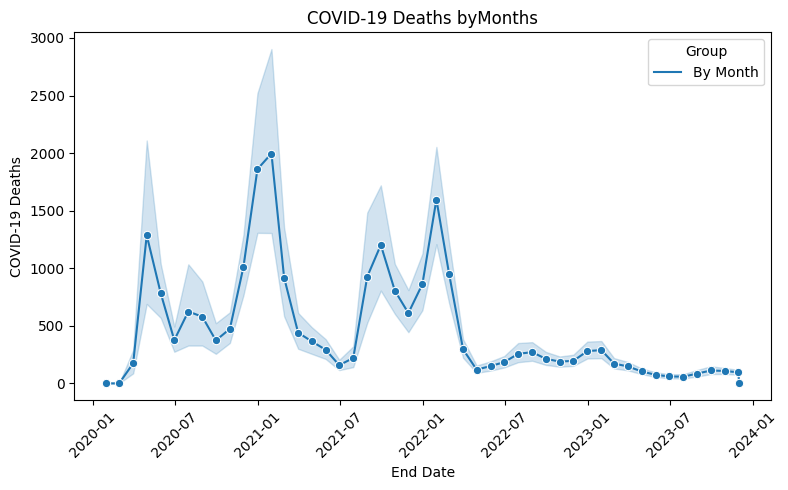

In [76]:
df = pd.DataFrame(df_state_bymonth, columns=['End Date', 'Group', 'COVID-19 Deaths'])
plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='End Date', y='COVID-19 Deaths', hue='Group', marker='o')
plt.xticks(rotation=45)
plt.title('COVID-19 Deaths byMonths')
plt.xlabel('End Date')
plt.ylabel('COVID-19 Deaths')
plt.tight_layout()
plt.show()

Top 10 states affected by COVID-19:

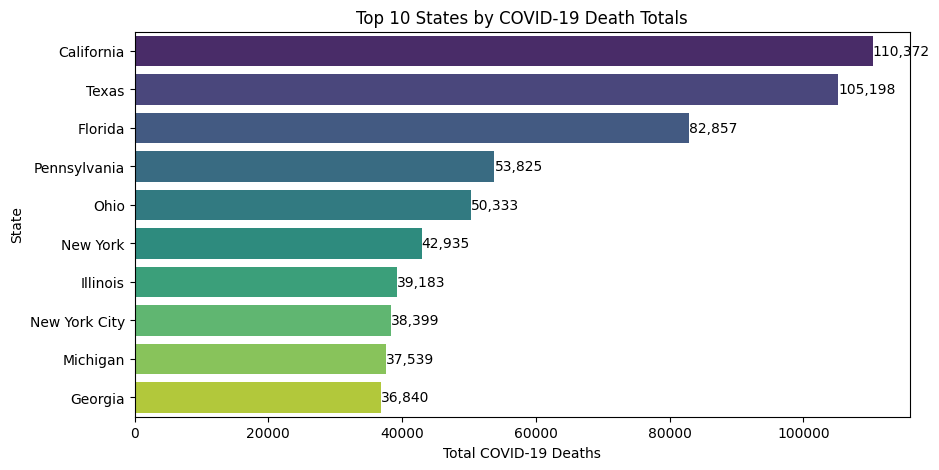

In [87]:
df = pd.DataFrame(df_state_bytotal, columns=['State', 'COVID-19 Deaths'])
state_death_totals = df.groupby('State')['COVID-19 Deaths'].sum().sort_values(ascending=False)

top_states = state_death_totals.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.values, y=top_states.index, palette='viridis')
plt.title('Top 10 States by COVID-19 Death Totals')
plt.xlabel('Total COVID-19 Deaths')
plt.ylabel('State')
for i, value in enumerate(top_states.values):
    plt.text(value, i, f'{value:,}', va='center')
plt.show()